## Part 2: Drawing the Heptagon

The heptagon numbers we defined in [Part 1](http://nbviewer.ipython.org/github/vorth/ipython/blob/master/heptagons/HeptagonNumbers.ipynb) are obviously useful for defining lengths of lines in a figure like the one below, since all of those line lengths are related to the $\rho$ and $\sigma$ ratios.  But will heptagon numbers suffice for the coordinates we must give to a graphics library, to draw line segments on the screen?  The answer turns out to be yes, though we'll need one little trick to make it work.

<img src="heptagonSampler.png" width=1100 height=600 />


### Finding the Heptagon Vertices

To start with, we will try to construct coordinates for the seven vertices of the heptagon.  We will label the points as in the figure below, $P0$ through $P6$.

<img src="heptagonVertices.png" width=500 height=500 />

For convenience, we can say that $P0$ is the origin of our coordinate system, so it will have coordinates $(0,0)$.  If the heptagon edge length is one, then the coordinates of point $P1$ are clearly $(1,0)$.  But now what?  We can use the Pythogorean theorem to find the coordinates of point $P4$, but we end up with $(1/2,a)$, where

$$a = \sqrt{\sigma^2 - \frac{1}{4}}
   = \sqrt{\frac{3}{4} + \rho + \sigma} $$
   
This is annoying, since we have no way to take the square root of a heptagon number!  Fortunately, there is an easier way.

Suppose we abandon our *usual* Cartesian coordinate frame, and use one that works a little more naturally for us?  We can use a different frame of reference, one where the "y" axis is defined as the line passing through points $P0$ and $P4$.  We can then model all the heptagon vertices quite naturally, and adjust for the modified frame of reference when we get to the point of drawing.

For the sake of further convenience, let us scale everything up by a factor of $\sigma$.  This makes it quite easy to write down the coordinates of all the points marked on the diagram above.  Notice the three points I have included in the interior of the heptagon.  Those points divide the horizontal and vertical diagonals into $\rho:\sigma:1$ and $\rho:\sigma$ proportions.  So now we have:

|point|coordinates|
|-----|-----------|
|$P0$|$(0,0)$|
|$P1$|$(\sigma,0)$|
|$P2$|$(1+\sigma,\rho)$|
|$P3$|$(\sigma,\rho+\sigma)$|
|$P4$|$(0,1+\rho+\sigma)$|
|$P5$|$(-\rho,\rho+\sigma)$|
|$P6$|$(-\rho,\rho)$|

If we render our heptagon and heptagrams with these coordinates, *ignoring* the fact that we used an unusual coordinate frame, we get a skewed heptagon:

<img src="skewHeptagon.png" width=500 height=500 />

This figure is certainly not *regular* in any usual sense, since
the edge lengths and angles vary, but we could refer to it as an **affine regular heptagon** (and associated heptagrams).  In linear algebra, an *affine* transformation is one that preserves parallel lines and ratios along lines.  Those are exactly the properties that we took advantage of in capturing our coordinates.

Although we have not yet discussed how we will accommodate the skew coordinate frame we've used, let's take a look at the Python code to capture the vertices used above.  Note that a point is represented simply as a pair of heptagon numbers, using Python's tuple notation.


In [1]:
# load the definitions from the previous notebook
%run HeptagonNumbers.py

# represent points or vertices as pairs of heptagon numbers

p0 = ( zero, zero )
p1 = ( sigma, zero )
p2 = ( plus( one, sigma ), rho )
p3 = ( sigma, rho_sigma )
p4 = ( zero, sigma_2 )
p5 = ( neg( rho ), rho_sigma )
p6 = ( neg( rho ), rho )

heptagon = [ p0, p1, p2, p3, p4, p5, p6 ]

heptagram_rho = [ p0, p2, p4, p6, p1, p3, p5 ]

heptagram_sigma = [ p0, p3, p6, p2, p5, p1, p4 ]


(0, 1, 1)
(1, 0, 1)
(1, 1, 1)
(1, 0, 0)
(0, -2, 1)


### Evaluating a Heptagon Number


We are almost ready to look at Python code for drawing these figures.  The last step is to provide a mapping from heptagon numbers to real numbers, since any drawing library requires us to provide points as $(x,y)$ pairs, where $x$ and $y$ are floating-point numbers.  This is easy, of course: we just evaluate the expression $a+b\rho+c\sigma$, using predefined values for $\rho$ and $\sigma$.  But what are those values?

We can easily derive them from a tiny bit of trigonometry, looking at our heptagon-plus-heptagrams figure again.

<img src="findingConstants.png" width=500 height=500 />

I have rotated the heptagon a bit, so we see angles presented in the traditional way, with zero radians corresponding to the X axis, to the right, and considering angles around the point $A$.  We can find $\sigma$ using the right triangle $\triangle ABC$.  If our heptagon has edge length of one, then line segment $AB$ has length $\sigma$, by definition, and line segment $BC$ has length $1/2$.  Remembering the formula for the sine function (opposite over hypotenuse), we can see that

$$\sin \angle CAB = \frac{1/2}{\sigma} = \frac{1}{2\sigma}$$

which means that

$$\sigma = \frac{1}{2\sin \angle CAB}$$

Now we just need to know what angle $\angle CAB$ is.  Here, you can have some fun by convincing yourself that $\angle CAB$ is equal to $\pi/14$ radians.  As a hint, first use similar triangles to show that all those narrow angles at the heptagon vertices are equal to $\pi/7$.  In any case, we have our value for $\sigma$:

$$\sigma = \frac{1}{2\sin{\frac{\pi}{14}}} $$

Computing $\rho$ is just as easy.  It is convenient to use triangle $\triangle ADE$, with the following results:

$$\frac{\rho}{2} = \sin{\angle EAD} = \sin{\frac{5\pi}{14}}$$

$$\rho = 2\sin{\frac{5\pi}{14}}$$

Converting the results into Python code, we can capture our values of $\rho$ and $\sigma$ as constants, and define our mapping functions, for later use in the drawing code.


In [7]:
import math

sigma_real = 1 / (2* math.sin(math.pi/14))
print "sigma = " + str( sigma_real )

rho_real = 2*math.sin(5*math.pi/14)
print "rho = " + str( rho_real )

# This function maps from the heptagon field to the real numbers
# (as floating point values), so that we can render graphics.
def asReal(h):
    a, b, c = h
    return a + b*rho_real + c*sigma_real

# This function maps from a pair of heptagon numbers to
#  a pair of floating point numbers (approximating real numbers)
def render( v ):
    x, y = v
    return [ asReal(x), asReal(y) ]


sigma = 2.24697960372
rho = 1.8019377358


### Python Code for Drawing

Although we have not yet discussed how we will accommodate the skew coordinate frame we've used, let's take a look at the Python code to render the skewed heptagon shown earlier.  I won't go over the details of the `matplotlib` drawing library, since you can explore the online documentation.  The thing to note is the `drawPolygon` function, which takes an array of heptagon number pairs as vertices, then renders them and draws a path connecting them.

Populating the interactive namespace from numpy and matplotlib


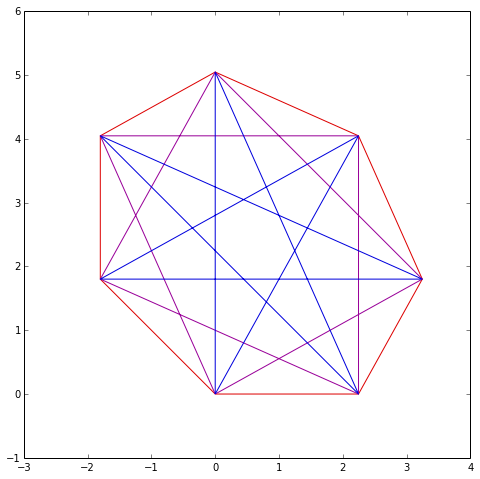

In [8]:
%pylab inline

import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches
Path = mpath.Path

def drawPolygon( polygonVerts, color, mapping=render ):
    n = len( polygonVerts )
    codes = [ Path.MOVETO ]
    verts = []
    verts .append( mapping( polygonVerts[ 0 ] ) )
    for i in range(1,n+1):
        codes.append ( Path.LINETO )
        verts.append ( mapping( polygonVerts[ i % n ] ) )
    path = mpath.Path( verts, codes )
    return mpatches.PathPatch( path, facecolor='none', edgecolor=color )

def drawHeptagrams( mapping=render ):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    ax.add_patch( drawPolygon( heptagon,'#dd0000', mapping ) )
    ax.add_patch( drawPolygon( heptagram_rho,'#990099', mapping ) )
    ax.add_patch( drawPolygon( heptagram_sigma,'#0000dd', mapping ) )
    ax.set_xlim(-3,4)
    ax.set_ylim(-1,6)

drawHeptagrams()

### Correcting the Skew

Now all that remains is to straighten up our heptagon by applying a shear transformation.  This is simpler than it sounds, using the most basic technique of linear algebra, a change of basis.

The trick is to represent points as a column vectors:

$$(x,y) \Rightarrow \begin{bmatrix}x \\ y\end{bmatrix}$$

Now, consider the vectors corresponding to the natural basis vectors we used to construct the heptagon vertices:

$$ \begin{bmatrix}1 \\ 0\end{bmatrix}, \begin{bmatrix}0 \\ 1\end{bmatrix} $$

What should our transformation do to these two vectors?  We don't need any change in the X-axis direction, so we'll leave that one alone.

$$ \begin{bmatrix}1 \\ 0\end{bmatrix} \Rightarrow \begin{bmatrix}1 \\ 0\end{bmatrix} $$

For the Y-axis, we must determine what point in a traditional cartesian plane corresponds to our "vertical" basis vector.  We can find that by applying a bit of trigonometry, as we did when deriving $\rho$ and $\sigma$ earlier.  The result is:

$$ \begin{bmatrix}1 \\ 0\end{bmatrix} \Rightarrow \begin{bmatrix} \frac{1}{2\sigma} \\ \sin\frac{3}{7}\pi\end{bmatrix} $$

It turns out that specifying those two transformations is equivalent to specifying the transformation of any initial vector.  We use our transformed basis vectors as the column of a matrix, and write:

$$\begin{bmatrix}x' \\ y'\end{bmatrix} = \begin{bmatrix}1 & \frac{1}{2\sigma} \\0 & \sin\frac{3}{7}\pi\end{bmatrix}
\begin{bmatrix}x \\ y\end{bmatrix}$$

Again, this is simpler than it looks.  It is just a way of writing one equation that represents two equations:

$$ x' = x + y \frac{1}{2\sigma} $$

$$ y' = y \sin\frac{3}{7}\pi $$

And now we finally have something that we can translate directly into Python, to render our heptagon and heptagrams with full symmetry.  Since we defined `drawHeptagrams` to accept a rendering function already, we can just call it again with the new function.

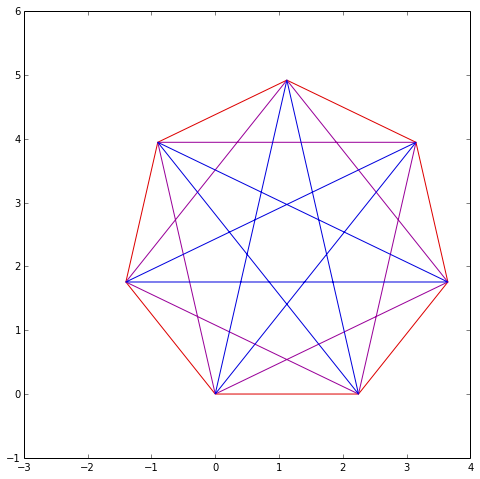

In [6]:
def skewRender(v):
    x = asReal( v[0] )
    y = asReal( v[1] )
    x = x + y/(2*sigma_real)
    y = math.sin( (3.0/7.0) * math.pi ) * y
    return [ x, y ]

drawHeptagrams( skewRender )

### Summary, and a Look Ahead

I've shown you how to use heptagon numbers to represent the vertices of a regular heptagon in a very natural way, and how to draw the result faithfully.  There are many more interesting figures that can be drawn using these techniques, including some beautiful aperiodic tilings:

http://tilings.math.uni-bielefeld.de/substitution_rules/danzers_7_fold_0

http://tilings.math.uni-bielefeld.de/substitution_rules/danzers_7_fold_original

http://tilings.math.uni-bielefeld.de/substitution_rules/goodman_strauss_7_fold_rhomb

To be able to generate figures like those, you'll need to know how to apply the rotations that are at the heart of the symmetry of the heptagon.

In Part 3, I will show you how to apply such rotations, and in particular how to render the recursive "nautilus shell" figure shown at the beginning of this article.